Dataset Overview:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (tot

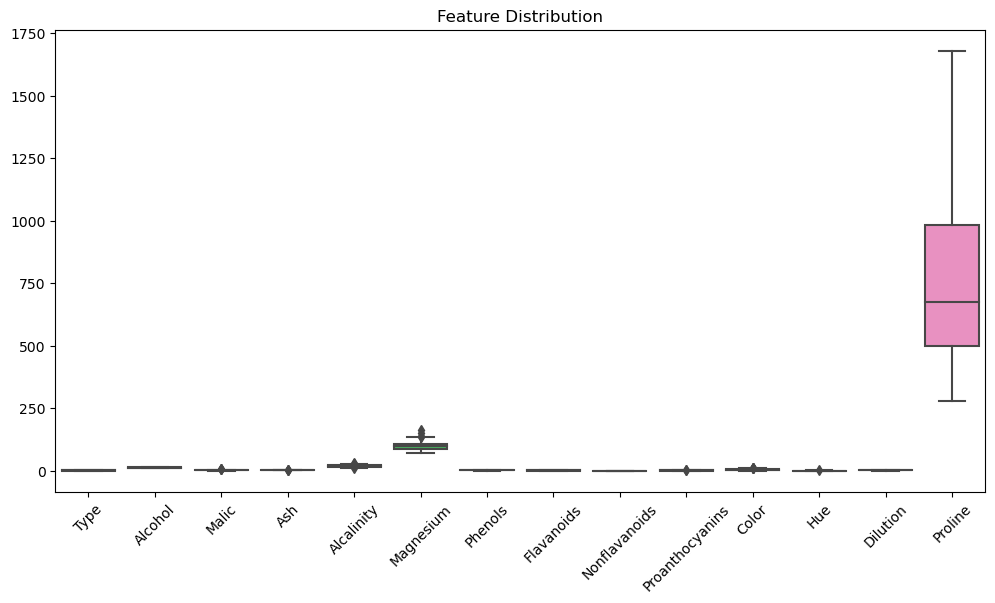

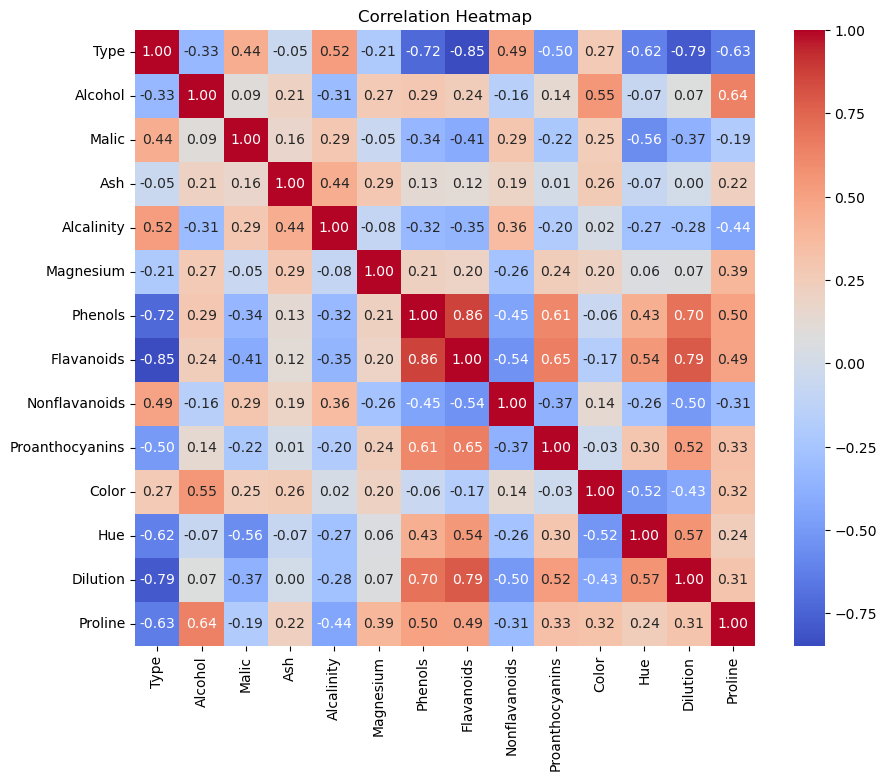

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


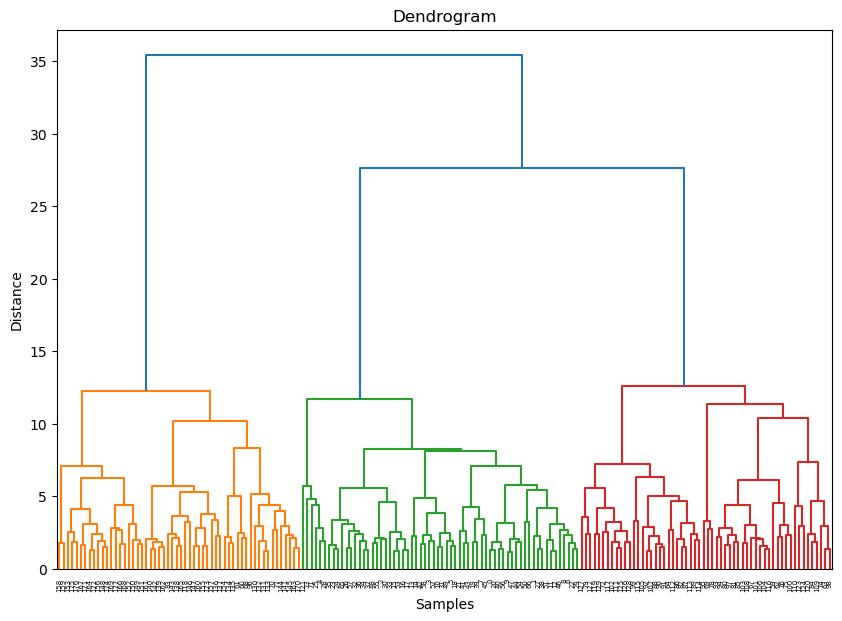

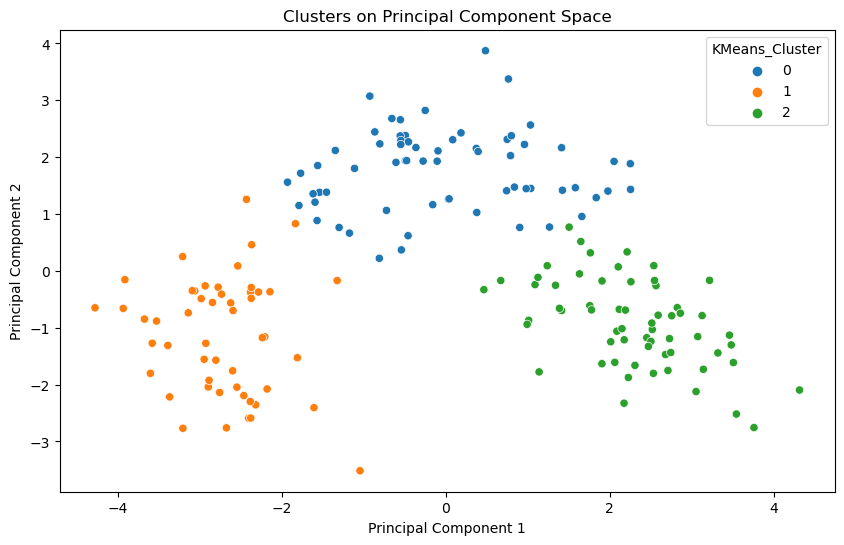

Silhouette Score: 0.2848589191898987


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\PCA\wine.csv")
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())



print("\nMissing Values:")
print(df.isnull().sum())


plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Feature Distribution")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Type', axis=1))


pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
pca_df['KMeans_Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 7))
dendrogram(linkage(scaled_features, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='tab10', legend='full')
plt.title("Clusters on Principal Component Space")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)
